In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def load_sample_data(file_path, n_rows=1000):
    """
    Load the first n rows of a CSV file.
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file
    n_rows : int, optional
        Number of rows to read (default: 1000)
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame containing the first n rows of the CSV file
    """
    return pd.read_csv(file_path, nrows=n_rows)


In [8]:
raw_data_path = r'C:\Users\james\github\Capstone\data\raw_data\hsls_09\hsls_17_student_pets_sr_v1_0.csv'

# Read first 5000 rows
df_sample = load_sample_data(raw_data_path, n_rows=5000)

df_sample.head()

,STU_ID,SCH_ID,X1NCESID,X2NCESID,STRAT_ID,PSU,X2UNIV1,X2UNIV2A,X2UNIV2B,X3UNIV1,...,W5W1W2W3W4PSRECORDS191,W5W1W2W3W4PSRECORDS192,W5W1W2W3W4PSRECORDS193,W5W1W2W3W4PSRECORDS194,W5W1W2W3W4PSRECORDS195,W5W1W2W3W4PSRECORDS196,W5W1W2W3W4PSRECORDS197,W5W1W2W3W4PSRECORDS198,W5W1W2W3W4PSRECORDS199,W5W1W2W3W4PSRECORDS200
0,10001,-5,-5,-5,-5,-5,11,1,1,1111,...,0.0,2098.087446,1824.641398,0.0,2431.665487,0.0,0.0,2457.423209,0.0,2053.40787
1,10002,-5,-5,-5,-5,-5,11,1,1,1111,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
2,10003,-5,-5,-5,-5,-5,11,1,1,1111,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
3,10004,-5,-5,-5,-5,-5,10,1,7,1001,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000
4,10005,-5,-5,-5,-5,-5,11,1,1,1111,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000


In [31]:
view_cols = ['STU_ID', 
             'X1TXMTH',
             'X1TXMQUINT',      # X1 Mathematics quintile score
             'X1FAMINCOME',     # X1: family income
             'X4INCOMECAT',     # X4: income category
             'X1SES',           # X1: socioeconomic status
             'X1SESQ5',         # X1: socioeconomic status quintile
#             'X1LOCALE',        # X1: locale
#             'X1REGION',        # X1: region
             'S4HSGPA',         # S4 A07 Average grades in high school
             'X3TGPAMAT',       # X3 GPA: mathematics
             'X3TGPASCI',       # X3 GPA: science
             'X3TGPAENG',       # X3 GPA: English
             'S2REQSEL4YR',     # S2 C10D Will meet requirements for selective 4-year college by summer 2013
             'S2AFF4YSEL',      # S2 C36F Can afford highly selective 4-year private college
             'X4EVRAPPCLG',     # X4: ever applied to college
             'X4CLGAPPNUM',     # X4: college application number
             'S4EVERAPPLY',     # S4: ever applied to college
             'S3CHOICEAPPSEL',  # S3 First choice applied to college IPEDS selectivity code
             'X5PFYSLC',        # Student Records: Institutional selectivity of primary first year institution
             'S3CLGSEL',        # S3 Enrolled college IPEDS selectivity code
             'S3PROGLEVEL',     # S3 C02 Level of program enrolled in as of Nov 1 2013
             'X5HIGHDEG',       # X5: highest degree
             'X5BACCRED',       # X5: baccalaureate degree
             'X5SRRESP',        # X5: student response
             'X5PFYSEC'         # X5: postsecondary enrollment
            ]

df_sample[view_cols].head()

,STU_ID,X1TXMTH,X1TXMQUINT,X1FAMINCOME,X4INCOMECAT,X1SES,X1SESQ5,S4HSGPA,X3TGPAMAT,X3TGPASCI,...,S2REQSEL4YR,S2AFF4YSEL,X4EVRAPPCLG,X4CLGAPPNUM,S4EVERAPPLY,X5PFYSLC,X5HIGHDEG,X5BACCRED,X5SRRESP,X5PFYSEC
0,10001,0.8304,5,10,4,1.5644,5,-7,3.0,3.0,...,1,1,1,1,-7,3,0,0,1,2
1,10002,-0.2956,2,3,12,-0.3699,2,-7,4.0,4.0,...,-9,2,1,3,-7,-8,0,0,2,-8
2,10003,1.2997,5,6,7,1.2741,5,-7,2.5,2.5,...,2,2,1,10,-7,-8,0,0,2,-8
3,10004,-0.1427,3,5,8,0.5498,5,-7,3.5,3.5,...,-8,-8,-9,-9,-4,-6,-6,-6,0,-6
4,10005,1.1405,5,9,1,0.1495,4,-7,2.5,3.0,...,2,-9,1,1,-7,-6,-6,-6,0,-6


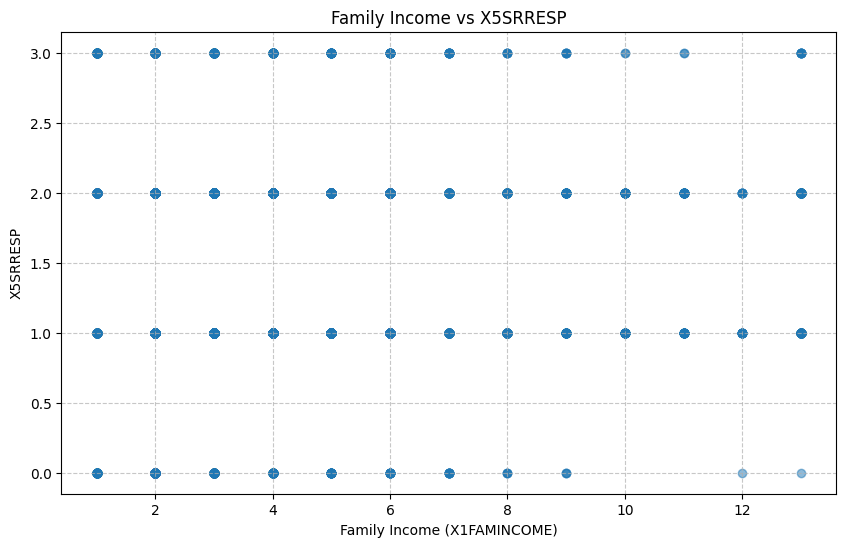

In [21]:
# Clean the data by removing negative values (missing data codes)
clean_df = df_sample[
    (df_sample['X1FAMINCOME'] >= 0) & 
    (df_sample['X5SRRESP'] >= 0)
]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(clean_df['X1FAMINCOME'], clean_df['X5SRRESP'], alpha=0.5)
plt.xlabel('Family Income (X1FAMINCOME)')
plt.ylabel('X5SRRESP')
plt.title('Family Income vs X5SRRESP')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [23]:
df_full = pd.read_csv(raw_data_path)
df_full.shape

(23503, 9614)

In [1]:
df_full.shape

NameError: name 'df_full' is not defined